Do the necessary imports 

In [21]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

Lets create a utility function that allows matplotlib plt function to 
display BGR channel images.

In [22]:
def matplotify_image(image: np.ndarray):
    return image[:,:,::-1]

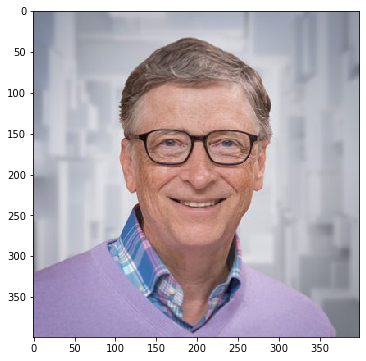

In [23]:
# import the image of bill gates and show it
bill_image = cv2.imread('bill.jpg')
plt.imshow(matplotify_image(bill_image))

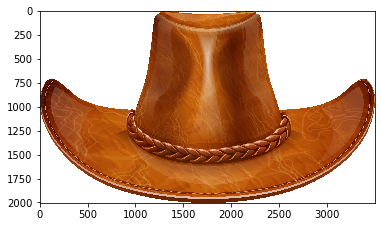

In [24]:
# now load the hat image. This is a 4 channle, PNG/alpha image
hat_image = cv2.imread('hat.png', cv2.IMREAD_UNCHANGED)

# now lets split the image into BGR and Alpha channels
hatBGR = hat_image[:,:,0:3]
hatAlpha = hat_image[:,:,3]

# now lets show the hat image
plt.imshow(matplotify_image(hatBGR))

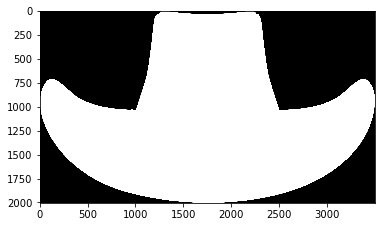

In [25]:
 # now lets show how the alpha channel looks like
plt.imshow(hatAlpha, cmap='gray')

It is evident from the PNG image of the hat that the transparent regions are
 the dark regions and the opaque regions showing the actual hat are the 
 white regions. We would try to create a mask of the hat and superimpose the
  hat image onto Bill Gate's head.

In [26]:
# first create a 3 channel image from the 1 channel alpha image
hatMask = cv2.merge((hatAlpha, hatAlpha, hatAlpha))

Now lets extract a region of interest from Bill's head region on which we 
will place the hat. This looks more like the region between 0 to 100 pixels 
along y axis and 95 to 300 pixel along x axis of Bill's image.

Shape of ROI: (100, 205, 3)


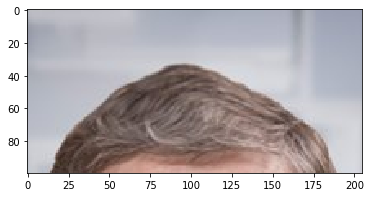

In [27]:
headROI = bill_image[0:100, 95:300]

# print the shape of the region extracted
print(f"Shape of ROI: {headROI.shape}")
# lets see if we extracted the rgion correctly
plt.imshow(matplotify_image(headROI))

Next, we would superimpose the negative mask onto the head in the ROI.

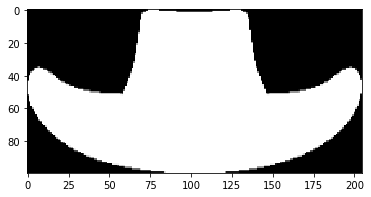

In [28]:
# calculate the scale ratio along longer dimension
ratio = headROI.shape[1] / hatMask.shape[1]

# first resize the mask to appropriate size mantianing aspect
hatMaskResized = cv2.resize(hatMask, None, fx=ratio, fy=ratio)

# do second step resize to resize along shorter dimension so that fibal 
# image is of the required final dimensions
hatMaskResized = cv2.resize(hatMaskResized, dsize=(headROI.shape[1],
                                                   headROI.shape[0]))

# now lets look at the resized image
plt.imshow(hatMaskResized)

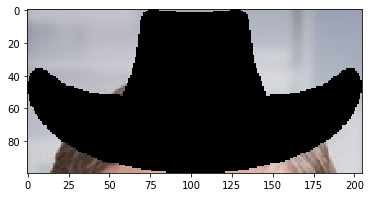

In [41]:
# now convert the mask into a binary filter
binaryMask = np.uint8(hatMaskResized / 255)

# now superimpose the negative mask onto the ROI
headROIWithNegativeMask = cv2.multiply(headROI, 1-binaryMask)

# now show the superimposition
plt.imshow(matplotify_image(headROIWithNegativeMask))

Now, lets superimpose the binary mask with the resized hat BGR image.

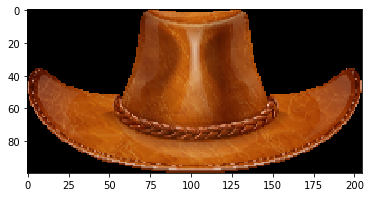

In [43]:
# first resize the hat BGR
hatBGRResized = cv2.resize(hatBGR, None, fx=ratio, fy=ratio)
hatBGRResized = cv2.resize(hatBGRResized, dsize=(headROI.shape[1],
                                                 headROI.shape[0]))

# next superimpose with the resized mask
hatBGRWithMask = cv2.multiply(hatBGRResized, binaryMask)

# display the result
plt.imshow(matplotify_image(hatBGRWithMask))

We can see that we have an image of just the hat with its background 
darkened due to the application of the positive mask. Next, we would add 
this image to the image of the head ROI with the negative mask.

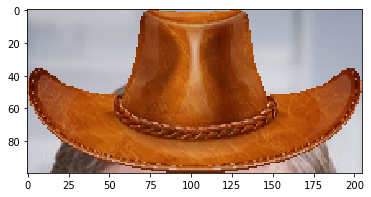

In [44]:
final_image = cv2.add(headROIWithNegativeMask,
                      hatBGRWithMask)

plt.imshow(matplotify_image(final_image))

From the output, it is evident that we have been able to place the hat in 
the head region in the desired location. Now, lets replace the head region 
of Bill's image with this image.

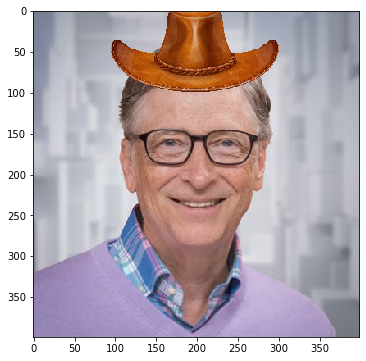

In [46]:
# first make a copy of Bill's image
bill_image_copy = bill_image.copy()

# replace the region in bills image with the image in the previous step
bill_image_copy[0:100, 95:300] = final_image

# display the final result
plt.imshow(matplotify_image(bill_image_copy))

From the output, we can see that, through the appropriate implementation of 
OpenCV arithmetic operations and masking techniques, we were able to place 
an artificial head on Bill Gate's head.